# Benchmarks

This script shows benchmarks of the Non-Uniform Fast Fourier Transform (NUFFT). There is a Fortran implementation of the NUFFT (python wrappers at http://github.com/dfm/python-nufft/) and the pure-Python implementation of NUFFT (http://github.com/jakevdp/nufftpy/).
Both are $O[N\log N]$ for $N$ observations and $N$ frequencies, but the fortran version is about two times faster than the pure Python version.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [2]:
import nufft
help(nufft.nufft1)

Help on function nufft1 in module nufft.nufft:

nufft1(x, y, ms, df=1.0, eps=1e-15, iflag=1, direct=False)



In [3]:
import nufftpy
help(nufftpy.nufft1)

Help on function nufft1 in module nufftpy.nufft:

nufft1(x, c, M, df=1.0, eps=1e-15, iflag=1, direct=False, fast_gridding=True, use_numba=True)
    Fast Non-Uniform Fourier Transform (Type 1: uniform frequency grid)
    
    Compute the non-uniform FFT of one-dimensional points x with complex
    values c. Result is computed at frequencies (df * m)
    for integer m in the range -M/2 < m < M/2.
    
    Parameters
    ----------
    x, c : array_like
        real locations x and complex values c of the points to be transformed.
    M, df : int & float
        Parameters specifying the desired frequency grid. Transform will be
        computed at frequencies df * (-(M//2) + arange(M))
    eps : float
        The desired approximate error for the FFT result. Must be in range
        1E-33 < eps < 1E-1, though be aware that the errors are only well
        calibrated near the range 1E-12 ~ 1E-6. eps is not referenced if
        direct = True.
    iflag : float
        if iflag<0, compute 

In [4]:
M = 100000
x = 100 * np.random.random(M)
c = np.exp(1j * x)

kwds = dict(eps=1E-8, iflag=-1, direct=False)

k1 = nufft.nufft1freqs(M)
F1 = nufft.nufft1(x, c, M, **kwds)

k2 = nufftpy.nufftfreqs(M)
F2 = nufftpy.nufft1(x, c, M, **kwds)

print(np.allclose(k1, k2))
print(np.allclose(F1, F2, atol=1E-8))

True
True


In [5]:
Mrange = (2 ** np.arange(3, 21)).astype(int)
kwds = dict(eps=1E-8, iflag=-1, direct=False)

nufft_times = []
nufftpy_times = []

for M in Mrange:
    x = 100 * np.random.random(M)
    c = np.exp(1j * x)
    
    t1 = %timeit -oq nufft.nufft1(x, c, M, **kwds)
    t2 = %timeit -oq nufftpy.nufft1(x, c, M, **kwds)
    
    nufft_times.append(t1.best)
    nufftpy_times.append(t2.best)

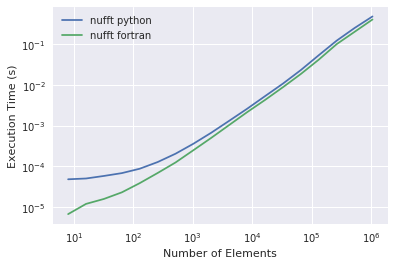

In [6]:
plt.loglog(Mrange, nufftpy_times, label='nufft python')
plt.loglog(Mrange, nufft_times, label='nufft fortran')
plt.legend(loc='upper left')
plt.xlabel('Number of Elements')
plt.ylabel('Execution Time (s)');

For large inputs, the pure-Python version is less than a factor of 2 slower than the optimized Fortran equivalent. Pretty good!